In [2]:
%matplotlib inline
import pandas as pd
# import pandas_datareader
import datetime
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib.pylab import style
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

style.use('ggplot')    
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  

/usr/local/lib/python3.5/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [11]:
stockFile = 'data/T10yr.csv'
stock = pd.read_csv(stockFile, index_col=0, parse_dates=[0])
stock.tail(10)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-07-18,1.577,1.604,1.556,1.587,0,1.587
2016-07-19,1.553,1.575,1.546,1.558,0,1.558
2016-07-20,1.568,1.596,1.566,1.580,0,1.580
2016-07-21,1.601,1.628,1.563,1.565,0,1.565
2016-07-22,1.585,1.599,1.544,1.570,0,1.570
2016-07-25,1.584,1.584,1.554,1.571,0,1.571
2016-07-26,1.559,1.587,1.549,1.563,0,1.563
2016-07-27,1.570,1.570,1.511,1.515,0,1.515
2016-07-28,1.525,1.535,1.493,1.511,0,1.511


In [13]:
stock_week = stock['Close'].resample('W-MON').mean()
stock_train = stock_week['2000':'2015']

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


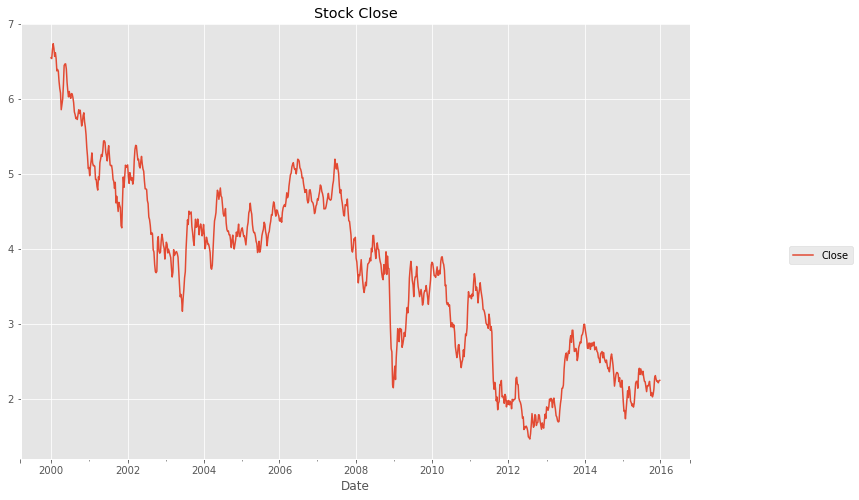

In [14]:
stock_train.plot(figsize=(12,8))
plt.legend(bbox_to_anchor=(1.25, 0.5))
plt.title("Stock Close")
sns.despine()

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


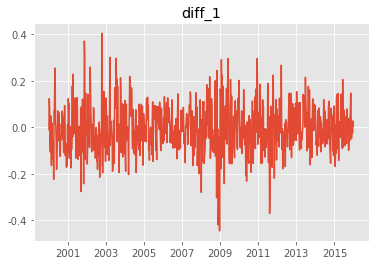

In [19]:
stock_diff = stock_train.diff()
stock_diff = stock_diff.dropna()

plt.figure()
plt.plot(stock_diff)
# plt.title('一阶差分')
plt.title('diff_1')
plt.show()

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


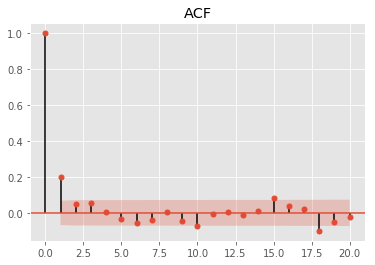

In [22]:
acf = plot_acf(stock_diff, lags=20)
plt.title("ACF")
acf.show()

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


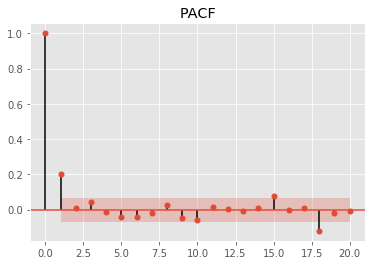

In [23]:
pacf = plot_pacf(stock_diff, lags=20)
plt.title("PACF")
pacf.show()

In [24]:
model = ARIMA(stock_train, order=(1, 1, 1),freq='W-MON')

In [27]:
result = model.fit()
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  834
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 720.846
Method:                       css-mle   S.D. of innovations              0.102
Date:                Wed, 25 Jul 2018   AIC                          -1433.692
Time:                        21:42:57   BIC                          -1414.787
Sample:                    01-10-2000   HQIC                         -1426.444
                         - 12-28-2015                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0052      0.005     -1.145      0.252      -0.014       0.004
ar.L1.D.Close     0.2841      0.203      1.397      0.163      -0.115       0.683
ma.L1.D.Close    -0.0869      0.213     

In [26]:
pred = result.predict('20140609', '20160701',dynamic=True, typ='levels')
print (pred)

2014-06-09    2.463559
2014-06-16    2.455539
2014-06-23    2.449569
2014-06-30    2.444183
2014-07-07    2.438962
2014-07-14    2.433788
2014-07-21    2.428627
2014-07-28    2.423470
2014-08-04    2.418315
2014-08-11    2.413159
2014-08-18    2.408004
2014-08-25    2.402849
2014-09-01    2.397693
2014-09-08    2.392538
2014-09-15    2.387383
2014-09-22    2.382227
2014-09-29    2.377072
2014-10-06    2.371917
2014-10-13    2.366761
2014-10-20    2.361606
2014-10-27    2.356451
2014-11-03    2.351296
2014-11-10    2.346140
2014-11-17    2.340985
2014-11-24    2.335830
2014-12-01    2.330674
2014-12-08    2.325519
2014-12-15    2.320364
2014-12-22    2.315208
2014-12-29    2.310053
                ...   
2015-12-07    2.057443
2015-12-14    2.052288
2015-12-21    2.047132
2015-12-28    2.041977
2016-01-04    2.036822
2016-01-11    2.031666
2016-01-18    2.026511
2016-01-25    2.021356
2016-02-01    2.016200
2016-02-08    2.011045
2016-02-15    2.005890
2016-02-22    2.000735
2016-02-29 

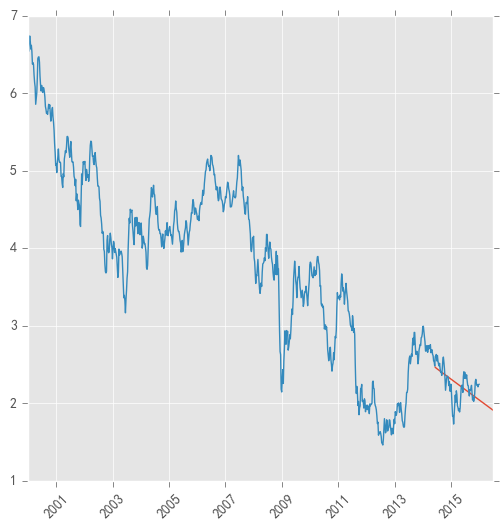

In [91]:
plt.figure(figsize=(6, 6))
plt.xticks(rotation=45)
plt.plot(pred)
plt.plot(stock_train)